### Data Preprocessing Imports
Imports include essential libraries for Spark, data manipulation (pandas, numpy), statistical analysis (scipy), and visualization (matplotlib, seaborn, plotly), along with tools for NLP and handling warnings.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from nltk.corpus import stopwords
import warnings

In [3]:
warnings.filterwarnings("ignore")   

### Gzip Data Loading
This code reads a gzipped JSON file, parses each line, and converts it into a pandas DataFrame for further analysis.

In [4]:
import json
import gzip

def parse_gzip(path):
    with gzip.open(path, 'rb') as f:
        for line in f:
            yield json.loads(line)


def load_data_from_gzip(path):
    data = []
    for entry in parse_gzip(path):
        data.append(entry)
    return pd.DataFrame(data)


gzip_path = r"C:\Users\JIYA\Downloads\AMAZON_FASHION.json.gz"
data = load_data_from_gzip(gzip_path)

print("Data Preview:")
print(data.head())


Data Preview:
   overall  verified   reviewTime      reviewerID        asin  reviewerName  \
0      5.0      True  10 20, 2014  A1D4G1SNUZWQOT  7106116521         Tracy   
1      2.0      True  09 28, 2014  A3DDWDH9PX2YX2  7106116521     Sonja Lau   
2      4.0     False  08 25, 2014  A2MWC41EW7XL15  7106116521      Kathleen   
3      2.0      True  08 24, 2014  A2UH2QQ275NV45  7106116521   Jodi Stoner   
4      3.0     False  07 27, 2014   A89F3LQADZBS5  7106116521  Alexander D.   

                                          reviewText  \
0                             Exactly what I needed.   
1  I agree with the other review, the opening is ...   
2  Love these... I am going to order another pack...   
3                                too tiny an opening   
4                                               Okay   

                                             summary  unixReviewTime vote  \
0                             perfect replacements!!      1413763200  NaN   
1  I agree with the 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         883636 non-null  float64
 1   verified        883636 non-null  bool   
 2   reviewTime      883636 non-null  object 
 3   reviewerID      883636 non-null  object 
 4   asin            883636 non-null  object 
 5   reviewerName    883544 non-null  object 
 6   reviewText      882403 non-null  object 
 7   summary         883103 non-null  object 
 8   unixReviewTime  883636 non-null  int64  
 9   vote            79900 non-null   object 
 10  style           304569 non-null  object 
 11  image           28807 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 75.0+ MB


### Population Ratings Distribution
This code groups the data by the 'overall' rating, counts the occurrences, and displays the distribution of ratings across the dataset.

In [6]:

population_ratings = data.groupby("overall").size().reset_index(name='count')

print("Population Ratings Distribution:")
print(population_ratings)


Population Ratings Distribution:
   overall   count
0      1.0  107080
1      2.0   64718
2      3.0   97031
3      4.0  149331
4      5.0  465476


### Sample Ratings Distribution
This code performs stratified sampling on the 'overall' rating to create a balanced sample, then aggregates and displays the sample's rating distribution.

In [7]:
from sklearn.model_selection import train_test_split


sample_data, _ = train_test_split(data, test_size=0.9, stratify=data['overall'], random_state=42)

sample_ratings = sample_data.groupby("overall").size().reset_index(name='count')

print("Sample Ratings Distribution:")
print(sample_ratings)


Sample Ratings Distribution:
   overall  count
0      1.0  10708
1      2.0   6472
2      3.0   9703
3      4.0  14933
4      5.0  46547


### Population vs. Sample Distribution Visualization
In this section, we create two Kernel Density Estimate (KDE) plots to compare the distribution of rating counts between the population and sample datasets. The two plots are presented side by side for easy comparison, allowing us to visually assess the similarities and differences in rating count distributions between the population and sample datasets.

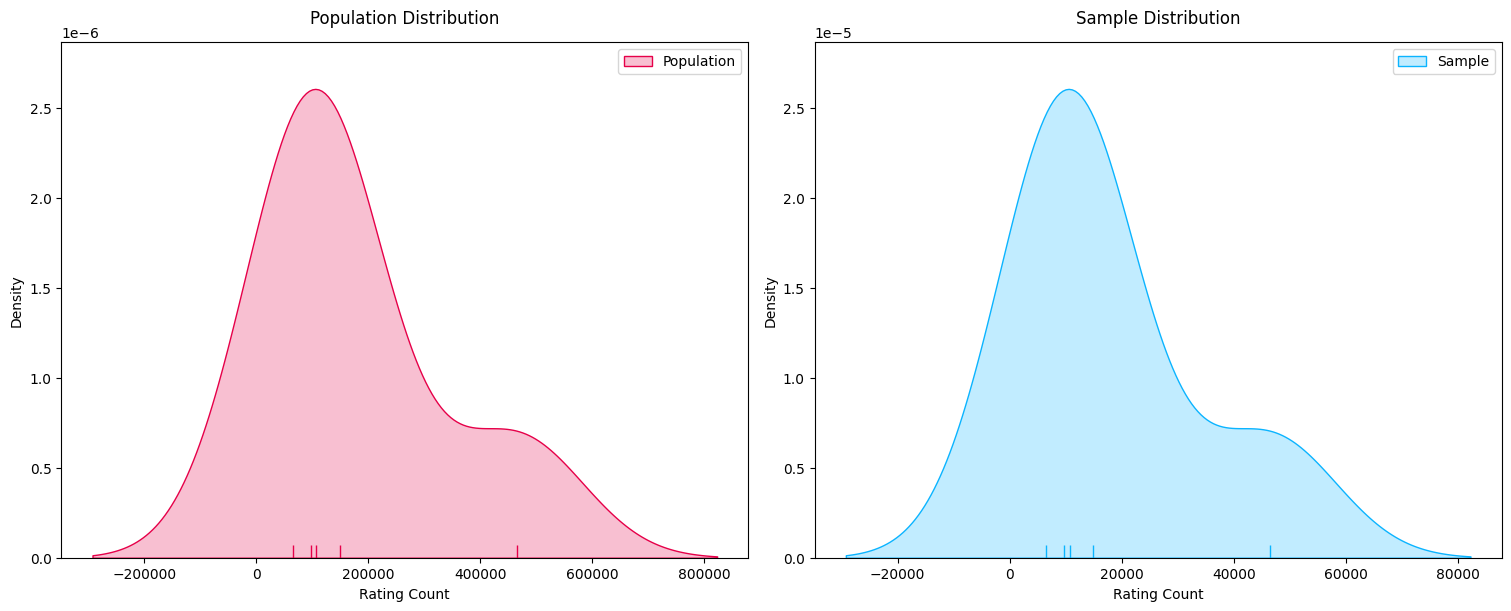

In [8]:
figure, axis = plt.subplots(ncols=2, figsize=(15, 6), constrained_layout=True)


sns.distplot(population_ratings["count"], color="#E60049", label="Population", hist=False, kde_kws={"shade": True}, axlabel="Rating Count", rug=True, ax=axis[0])
axis[0].set_title("Population Distribution", y=1.02)
axis[0].legend(loc="upper right")


sns.distplot(sample_ratings["count"], color="#0BB4FF", label="Sample", hist=False, kde_kws={"shade": True}, axlabel="Rating Count", rug=True, ax=axis[1])
axis[1].set_title("Sample Distribution", y=1.02)
axis[1].legend(loc="upper right")

plt.show()

In [9]:
data.dtypes

overall           float64
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
vote               object
style              object
image              object
dtype: object

### Data Cleaning
Missing values in 'reviewerName', 'reviewText', 'summary', 'vote', and 'image' columns are filled with "None." The 'unixReviewTime' column is converted to a human-readable format and renamed as 'reviewTime.'

In [10]:

data['reviewerName'] = data['reviewerName'].fillna("None")
data['reviewText'] = data['reviewText'].fillna("None")
data['summary'] = data['summary'].fillna("None")
data['vote'] = data['vote'].fillna("None")
data['image'] = data['image'].fillna("None")

data['unixReviewTime'] = pd.to_datetime(data['unixReviewTime'], unit='s')
data['reviewTime'] = data['unixReviewTime'].dt.strftime('%Y-%m-%d %H:%M:%S')

data = data.drop(columns=['unixReviewTime'])

data


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,style,image
0,5.0,True,2014-10-20 00:00:00,A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,None,NaN,None
1,2.0,True,2014-09-28 00:00:00,A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",3,NaN,None
2,4.0,False,2014-08-25 00:00:00,A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,None,NaN,None
3,2.0,True,2014-08-24 00:00:00,A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,None,NaN,None
4,3.0,False,2014-07-27 00:00:00,A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
883631,5.0,True,2017-02-21 00:00:00,A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,None,NaN,None
883632,5.0,True,2016-11-25 00:00:00,A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,2,NaN,None
883633,3.0,True,2016-11-10 00:00:00,A3O90PACS7B61K,B01HJHTH5U,Fabfifty,Too big in the chest area!,Three Stars,None,NaN,None
883634,3.0,True,2016-11-10 00:00:00,A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,None,NaN,None


### Handling Missing Values
All missing values in the DataFrame have been dropped, ensuring no null values remain.

In [11]:
data=data.dropna()    
data.isnull().sum()

overall         0
verified        0
reviewTime      0
reviewerID      0
asin            0
reviewerName    0
reviewText      0
summary         0
vote            0
style           0
image           0
dtype: int64

### Distribution of Product Ratings
A bar plot visualizes the distribution of product ratings, highlighting the frequency of each rating. Summary statistics provide insights into the overall dataset characteristics.

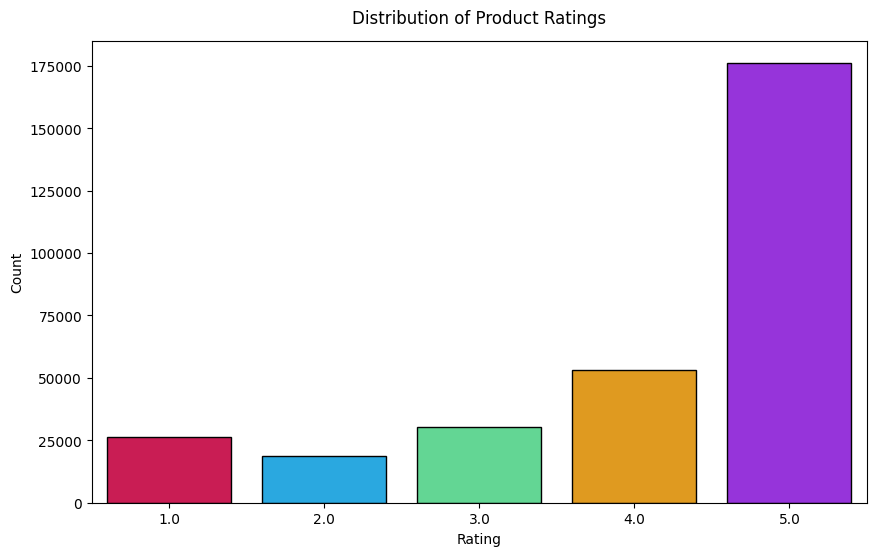

             overall
count  304569.000000
mean        4.099078
std         1.298370
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


In [12]:
summary_stats = data.describe()


rating_counts = data['overall'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x="Rating", y="Count", data=rating_counts, palette=["#E60049", "#0BB4FF", "#50E991", "#FFA300", "#9B19F5"], edgecolor="black")
plt.title("Distribution of Product Ratings", y=1.02)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

print(summary_stats)

### Five-Star Reviews Analysis
This analysis calculates the lengths of reviews rated 5.0, providing the maximum, minimum, and average lengths. Understanding review length helps gauge customer satisfaction and engagement levels.

In [13]:
five_star_reviews = data[data["overall"] == 5.0]


In [14]:
max_length = five_star_reviews["reviewText"].str.len().max()
min_length = five_star_reviews["reviewText"].str.len().min()
avg_length = five_star_reviews["reviewText"].str.len().mean()

print("Maximum Length of 5.0 Rated Reviews:", max_length)
print("Minimum Length of 5.0 Rated Reviews:", min_length)
print("Average Length of 5.0 Rated Reviews:", avg_length)


Maximum Length of 5.0 Rated Reviews: 6688
Minimum Length of 5.0 Rated Reviews: 1
Average Length of 5.0 Rated Reviews: 133.53357957027683


### Distribution of Review Lengths for Five-Star Reviews
This visualization displays the distribution of review lengths for reviews rated 5.0, highlighting the density of various review lengths. The plot helps identify trends in customer feedback and engagement based on review length.

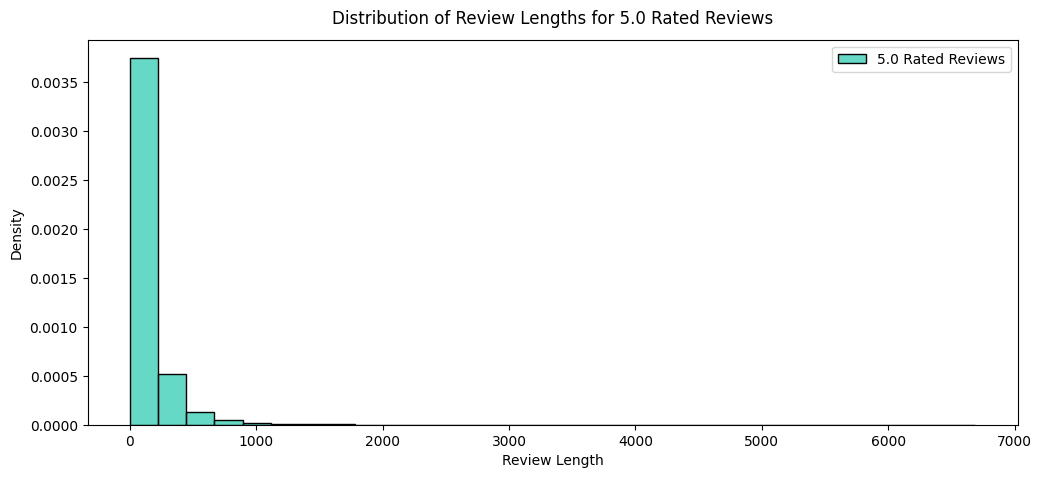

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

sns.histplot(
    five_star_reviews["reviewText"].str.len(), 
    color="#00BFA0", 
    stat="density", 
    bins=30, 
    label="5.0 Rated Reviews", 
    alpha=0.6
)

plt.title("Distribution of Review Lengths for 5.0 Rated Reviews", y=1.02)
plt.xlabel("Review Length")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.show()


### Distribution of Review Lengths for Five-Star Reviews Under 1000 Words
This analysis focuses on five-star reviews with lengths less than 1000 words, providing insights into the range and average lengths of shorter reviews. The histogram visualizes the density of these review lengths, indicating customer engagement in concise feedback.

Maximum Length of 5.0 Rated Reviews Less Than 1000 Words: 999
Minimum Length of 5.0 Rated Reviews Less Than 1000 Words: 1
Average Length of 5.0 Rated Reviews Less Than 1000 Words: 123.57969920943872


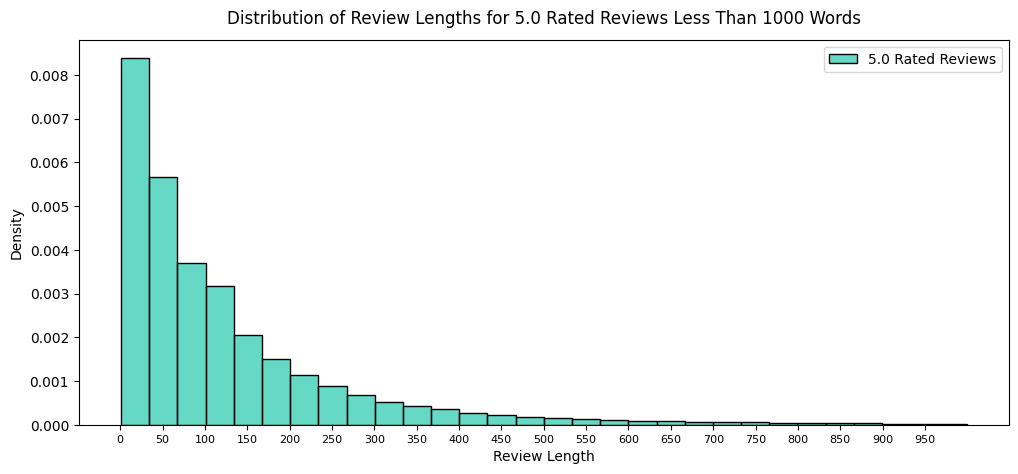

In [16]:
five_star_reviews_subset = five_star_reviews[five_star_reviews["reviewText"].str.len() < 1000]

print("Maximum Length of 5.0 Rated Reviews Less Than 1000 Words:", five_star_reviews_subset["reviewText"].str.len().max())
print("Minimum Length of 5.0 Rated Reviews Less Than 1000 Words:", five_star_reviews_subset["reviewText"].str.len().min())
print("Average Length of 5.0 Rated Reviews Less Than 1000 Words:", five_star_reviews_subset["reviewText"].str.len().mean())

plt.figure(figsize=(12, 5))
sns.histplot(five_star_reviews_subset["reviewText"].str.len(), color="#00BFA0", bins=30, stat="density", alpha=0.6)
plt.title("Distribution of Review Lengths for 5.0 Rated Reviews Less Than 1000 Words", y=1.02)
plt.xlabel("Review Length")
plt.ylabel("Density")
plt.xticks(np.arange(0, 1000, 50), fontsize=8)
plt.legend(["5.0 Rated Reviews"])
plt.show()


### Combined KDE Plot of Review Lengths for All Ratings Under 1000 Words
This visualization illustrates the density of review lengths across different ratings, focusing on reviews that are less than 1000 words. The KDE plot allows for a comparative analysis of how the length of reviews varies with rating, highlighting trends in customer feedback.

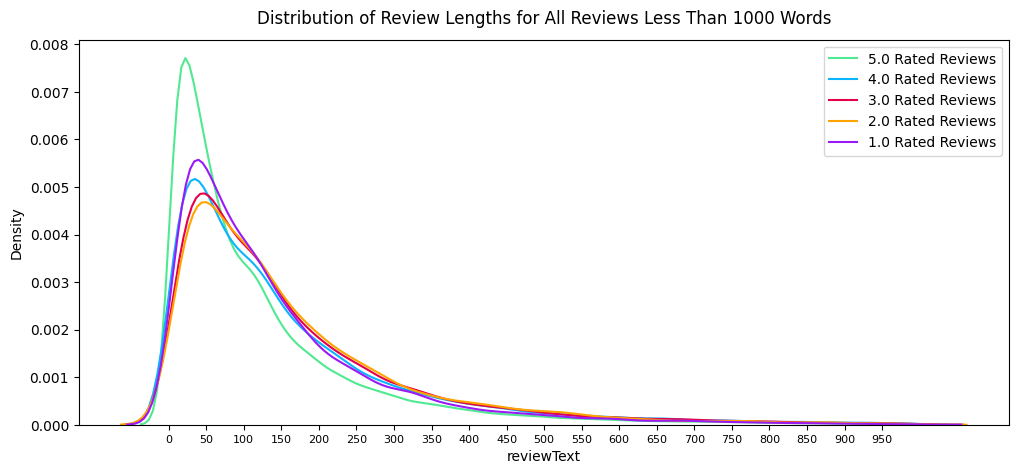

In [17]:

four_star_reviews = data[data["overall"] == 4.0]
three_star_reviews = data[data["overall"] == 3.0]
two_star_reviews = data[data["overall"] == 2.0]
one_star_reviews = data[data["overall"] == 1.0]

four_star_reviews_subset = four_star_reviews[four_star_reviews["reviewText"].str.len() < 1000]
three_star_reviews_subset = three_star_reviews[three_star_reviews["reviewText"].str.len() < 1000]
two_star_reviews_subset = two_star_reviews[two_star_reviews["reviewText"].str.len() < 1000]
one_star_reviews_subset = one_star_reviews[one_star_reviews["reviewText"].str.len() < 1000]

plt.figure(figsize=(12, 5))
sns.kdeplot(five_star_reviews_subset["reviewText"].str.len(), color="#50E991", label="5.0 Rated Reviews", fill=False)
sns.kdeplot(four_star_reviews_subset["reviewText"].str.len(), color="#0BB4FF", label="4.0 Rated Reviews", fill=False)
sns.kdeplot(three_star_reviews_subset["reviewText"].str.len(), color="#E60049", label="3.0 Rated Reviews", fill=False)
sns.kdeplot(two_star_reviews_subset["reviewText"].str.len(), color="#FFA300", label="2.0 Rated Reviews", fill=False)
sns.kdeplot(one_star_reviews_subset["reviewText"].str.len(), color="#9B19F5", label="1.0 Rated Reviews", fill=False)

plt.title("Distribution of Review Lengths for All Reviews Less Than 1000 Words", y=1.02)
plt.xticks(np.arange(0, 1000, 50), fontsize=8)
plt.legend(loc="upper right")
plt.show()


### Five-Star Reviews Length Statistics
This code filters five-star reviews to include only those with less than 1000 words and calculates their length statistics. It displays the maximum, minimum, and average lengths of these filtered reviews, providing insight into the characteristics of highly rated feedback.

In [18]:
five_star_reviews_subset = five_star_reviews[five_star_reviews["reviewText"].str.len() < 1000]
print("Maximum Length of 5.0 Rated Reviews Less Than 1000 Words:", five_star_reviews_subset["reviewText"].str.len().max())
print("Minimum Length of 5.0 Rated Reviews Less Than 1000 Words:", five_star_reviews_subset["reviewText"].str.len().min())
print("Average Length of 5.0 Rated Reviews Less Than 1000 Words:", five_star_reviews_subset["reviewText"].str.len().mean())


Maximum Length of 5.0 Rated Reviews Less Than 1000 Words: 999
Minimum Length of 5.0 Rated Reviews Less Than 1000 Words: 1
Average Length of 5.0 Rated Reviews Less Than 1000 Words: 123.57969920943872


### Change in 5.0 Rated Reviews Over Time
This code visualizes the trend of five-star rated reviews over time using a line chart. It illustrates how the quantity of these reviews has varied by date, providing insights into customer satisfaction trends for the products analyzed.

In [19]:
majority_review_time = five_star_reviews["reviewTime"].value_counts()
majority_review_time = majority_review_time.sort_index()

figure = go.Figure()
figure.add_trace(go.Scatter(
    x=majority_review_time.index,
    y=majority_review_time.values,
    mode="lines",
    name="lines",
    line=dict(color="#00BFA0", width=2),
    fill="tozeroy",
    fillcolor="rgba(0, 191, 160, 0.2)"
))

figure.update_layout(
    title="Change in 5.0 Rated Reviews Over Time",
    xaxis_title="Date",
    yaxis_title="Number of Reviews"
)
figure.show()


### Change in 5.0 Rated Reviews Over Time
This code generates a line chart showing the number of five-star rated reviews over time. It helps to visualize trends in customer satisfaction, indicating periods of higher or lower review activity.

In [20]:
majority_review_time = five_star_reviews["reviewTime"].value_counts()
majority_review_time = majority_review_time.sort_index()

figure = go.Figure()
figure.add_trace(go.Scatter(
    x=majority_review_time.index,
    y=majority_review_time.values,
    mode="lines",
    name="lines",
    line=dict(color="#00BFA0", width=2),
    fill="tozeroy",
    fillcolor="rgba(0, 191, 160, 0.2)"
))

figure.update_layout(
    title="Change in 5.0 Rated Reviews Over Time",
    xaxis_title="Date",
    yaxis_title="Number of Reviews"
)
figure.show()


### Percentage of Verified 5.0 Rated Reviews
This code creates a pie chart that illustrates the proportion of verified versus unverified five-star reviews. It provides insights into customer trust and the authenticity of positive feedback.

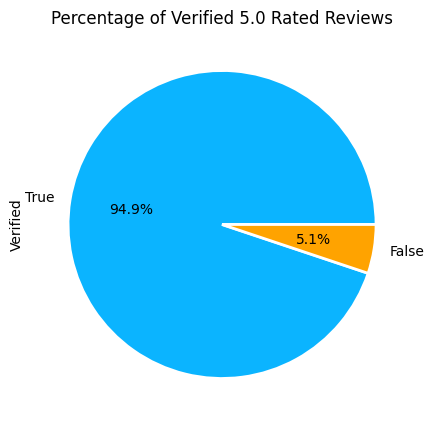

In [21]:
verification_status = five_star_reviews["verified"].value_counts()


verification_status.plot.pie(
    autopct="%1.1f%%",
    figsize=(5, 5),
    colors=["#0BB4FF", "#FFA300"],
    title="Percentage of Verified 5.0 Rated Reviews",
    fontsize=10,
    wedgeprops={"linewidth": 2, "edgecolor": "white"}
)
plt.ylabel("Verified")
plt.show()


### Correlation Between Review Length and Rating
This code calculates the correlation between the length of reviews and their ratings, adding a new column for review lengths. A scatter plot with a regression line visually represents this relationship, and the p-value indicates the statistical significance of the correlation.

Correlation Between Review Length and Rating: -0.0567476023048452


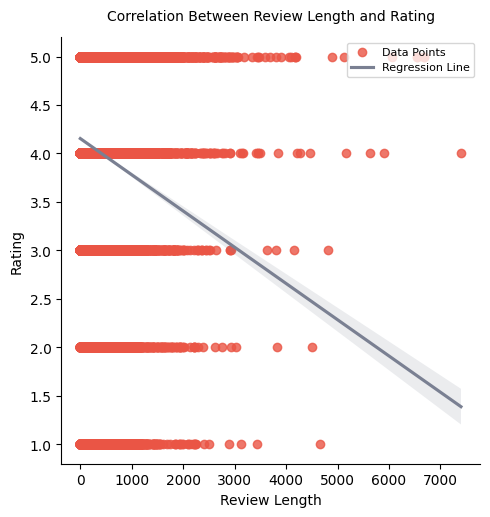

P-Value: 1.2170255765900145e-215


In [22]:
data["Review_Length"] = data["reviewText"].str.len()  
print("Correlation Between Review Length and Rating:", data["Review_Length"].corr(data["overall"])) 

sns.lmplot(x="Review_Length", y="overall", data=data, height=5, scatter_kws={"color": "#EA5545"}, line_kws={"color": "#7A8092"})
plt.title("Correlation Between Review Length and Rating", y=1.02, fontsize=10)
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.legend(["Data Points", "Regression Line"], loc="upper right", fontsize=8)
plt.show()


print("P-Value:", stats.pearsonr(data["Review_Length"], data["overall"])[1])  


### Correlation Calculation and Visualization
This code computes the correlation between review lengths and ratings, displaying the result. A scatter plot with a regression line illustrates this relationship, helping to visually assess how review length may influence the rating given.

In [23]:
data["Review_Length"] = data["reviewText"].str.len()  

Correlation Between Review Length and Rating: -0.0567476023048452


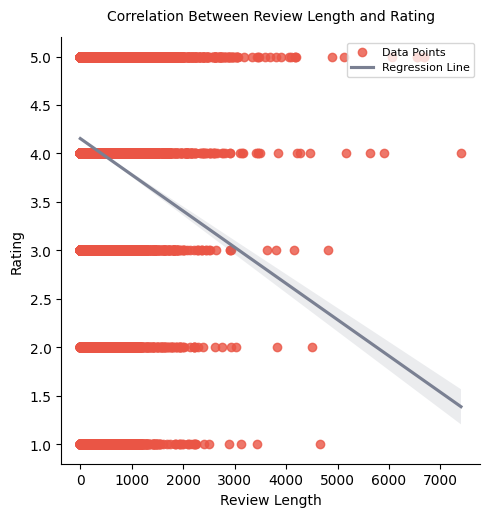

In [24]:
correlation = data["Review_Length"].corr(data["overall"])  
print("Correlation Between Review Length and Rating:", correlation)

sns.lmplot(x="Review_Length", y="overall", data=data, height=5, scatter_kws={"color": "#EA5545"}, line_kws={"color": "#7A8092"})
plt.title("Correlation Between Review Length and Rating", y=1.02, fontsize=10)
plt.xlabel("Review Length")
plt.ylabel("Rating")
plt.legend(["Data Points", "Regression Line"], loc="upper right", fontsize=8)
plt.show()


### Reviewer Count and Rating Correlation
This code calculates the correlation between the number of reviews per reviewer and their ratings, displaying the result. A scatter plot with a regression line visually represents the relationship, helping to analyze if more reviews correlate with higher ratings.

In [25]:
reviewer_counts = data["reviewerID"].value_counts()  
reviewer_counts = reviewer_counts.to_frame().reset_index()  
reviewer_counts.columns = ["reviewerID", "Review_Count"]  
reviewer_counts = reviewer_counts.merge(data[["reviewerID", "overall"]], on="reviewerID", how="left")  
reviewer_counts = reviewer_counts.drop_duplicates(subset=["reviewerID"])  
reviewer_counts = reviewer_counts.sort_values(by="overall", ascending=False)  
reviewer_counts = reviewer_counts.reset_index(drop=True)  


Correlation Between Number of Reviews and Rating: 0.008498792797146904


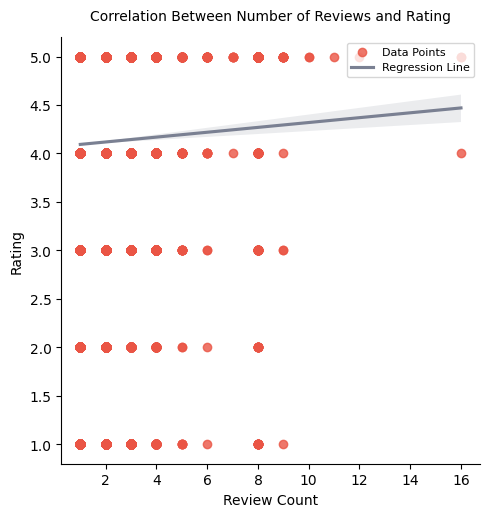

In [26]:
correlation = reviewer_counts["Review_Count"].corr(reviewer_counts["overall"])  # Calculating correlation
print("Correlation Between Number of Reviews and Rating:", correlation)

sns.lmplot(x="Review_Count", y="overall", data=reviewer_counts, height=5, scatter_kws={"color": "#EA5545"}, line_kws={"color": "#7A8092"})
plt.title("Correlation Between Number of Reviews and Rating", y=1.02, fontsize=10)
plt.xlabel("Review Count")
plt.ylabel("Rating")
plt.legend(["Data Points", "Regression Line"], loc="upper right", fontsize=8)
plt.show()


### Hypothesis Test for Correlation Significance
This code computes the p-value for the correlation between the number of reviews and ratings, helping to determine the significance of the correlation. A low p-value suggests that the correlation observed is statistically significant.

In [27]:

p_value = stats.pearsonr(reviewer_counts["Review_Count"], reviewer_counts["overall"])[1]  # Calculating p-value
print("P-Value:", p_value)


P-Value: 7.858487041690147e-06


### Function to Extract All Words from Reviews
This code defines a function `get_all_words`, which extracts all words from a specified column in a DataFrame containing reviews. The function splits each review into words and aggregates them into a list. It is then applied to the review texts for each star rating (1 to 5), resulting in separate lists for each rating's reviews.

In [28]:

def get_all_words(dataframe, column):
    all_words = []

    def add_words(review):
        words = review.split(" ")  
        all_words.extend(words) 

    dataframe[column].apply(add_words) 
    return all_words


In [29]:

all_words_five_star_reviews = get_all_words(five_star_reviews, "reviewText")
all_words_four_star_reviews = get_all_words(four_star_reviews, "reviewText")
all_words_three_star_reviews = get_all_words(three_star_reviews, "reviewText")
all_words_two_star_reviews = get_all_words(two_star_reviews, "reviewText")
all_words_one_star_reviews = get_all_words(one_star_reviews, "reviewText")


### Word Count Function and Usage
The function get_word_counts computes the frequency of each word in the provided list of words, removes common English stopwords, and returns a DataFrame containing the counts.

In [30]:

def get_word_counts(all_words):
    word_counts = pd.Series(all_words).value_counts()  
    word_counts = word_counts.to_frame().reset_index() 
    word_counts.columns = ["Word", "Count"]  
    word_counts = word_counts[~word_counts["Word"].isin(stopwords.words("english"))]
    return word_counts




### Result for Five-Star Reviews
To display the word counts for the five-star reviews, simply run `word_counts_five_stars` as shown. This will give you a DataFrame with words and their respective counts after filtering out the stopwords.


In [31]:

word_counts_five_stars = get_word_counts(all_words_five_star_reviews)
word_counts_four_stars = get_word_counts(all_words_four_star_reviews)
word_counts_three_stars = get_word_counts(all_words_three_star_reviews)
word_counts_two_stars = get_word_counts(all_words_two_star_reviews)
word_counts_one_star = get_word_counts(all_words_one_star_reviews)

word_counts_five_stars


,Word,Count
0,I,154518
6,,72628
23,The,25494
24,love,24744
25,fit,21836
...,...,...
120303,fantastic.\nmy,1
120304,"harder.\n\nAlso,",1
120305,Venitian.,1
120306,dowsing,1


The code generates word clouds for reviews ranging from five stars to one star. Each cloud visually represents the most frequent words in reviews for each rating, with larger words indicating higher frequency. The clouds are displayed in a 2x3 grid without axes for clarity.

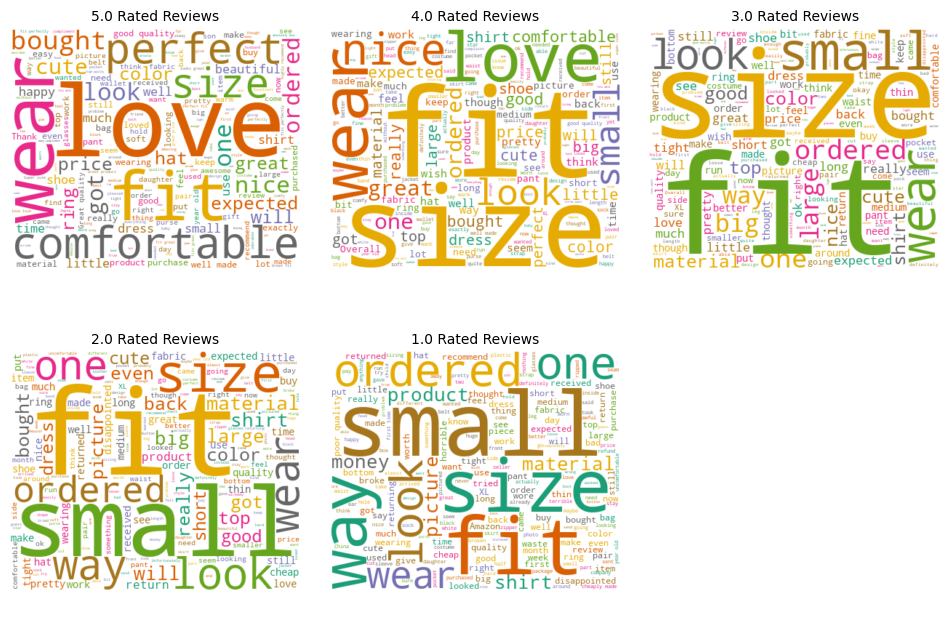

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


figure, axis = plt.subplots(2, 3, figsize=(12, 8))
figure.subplots_adjust(hspace=0.1, wspace=0.1)


wordcloud_five_stars = WordCloud(background_color="white", width=400, height=330, colormap="Dark2").generate(" ".join(all_words_five_star_reviews))
wordcloud_four_stars = WordCloud(background_color="white", width=400, height=330, colormap="Dark2").generate(" ".join(all_words_four_star_reviews))
wordcloud_three_stars = WordCloud(background_color="white", width=400, height=330, colormap="Dark2").generate(" ".join(all_words_three_star_reviews))
wordcloud_two_stars = WordCloud(background_color="white", width=400, height=330, colormap="Dark2").generate(" ".join(all_words_two_star_reviews))
wordcloud_one_star = WordCloud(background_color="white", width=400, height=330, colormap="Dark2").generate(" ".join(all_words_one_star_reviews))


axis[0, 0].imshow(wordcloud_five_stars, interpolation="bilinear")
axis[0, 0].set_title("5.0 Rated Reviews", fontsize=10)
axis[0, 0].axis("off")

axis[0, 1].imshow(wordcloud_four_stars, interpolation="bilinear")
axis[0, 1].set_title("4.0 Rated Reviews", fontsize=10)
axis[0, 1].axis("off")

axis[0, 2].imshow(wordcloud_three_stars, interpolation="bilinear")
axis[0, 2].set_title("3.0 Rated Reviews", fontsize=10)
axis[0, 2].axis("off")

axis[1, 0].imshow(wordcloud_two_stars, interpolation="bilinear")
axis[1, 0].set_title("2.0 Rated Reviews", fontsize=10)
axis[1, 0].axis("off")

axis[1, 1].imshow(wordcloud_one_star, interpolation="bilinear")
axis[1, 1].set_title("1.0 Rated Reviews", fontsize=10)
axis[1, 1].axis("off")

axis[1, 2].axis("off")  

plt.show()


# MODEL IMPLEMENTATION
We will implement multiple machine learning models to predict the purchase indication based on review data. We will evaluate the performance of each model using metrics such as **accuracy**, **precision**, **recall**, and **F1 score**, and visualize the performance comparison.


In [33]:
data_copy = data.copy()

In [34]:
# Drop unnecessary columns from data_copy
columns_to_drop = ['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'style', 'image','vote']
data_cleaned = data_copy.drop(columns=columns_to_drop)

# Verify the cleaned DataFrame
print(data_cleaned.dtypes)


verified           bool
reviewText       object
summary          object
Review_Length     int64
dtype: object


In [35]:
data_cleaned['verified'] = data_cleaned['verified'].astype(int)
data_cleaned

,verified,reviewText,summary,Review_Length
7,1,mother - in - law wanted it as a present for h...,bought as a present,93
8,1,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,340
9,1,I had used my last el-cheapo fake leather ciga...,Top Clasp Broke Within 3 days!,928
10,1,This brand has been around a long time and you...,BUXTON QUALITY!,135
11,1,I smoke 100's and these are NOT made for them....,Buxton Heiress Collection Black Leather Cigare...,122
...,...,...,...,...
883597,1,"Great hats, thank you!",good hats!,22
883598,1,Material feels very inexpensive but the hat fi...,Four Stars,61
883599,1,Nice hat to wear fishing fits good.,nice hat,35
883600,1,It a perfect it! made well.,Five Stars,27


# Sentiment Analysis using VADER

In this section, we will use the VADER sentiment analyzer to classify the reviews in our dataset as **positive**, **negative**, or **neutral**.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed to analyze the sentiment expressed in social media text. It provides a sentiment polarity score which ranges between -1 (most negative) and +1 (most positive).

## Steps:
1. **VADER Setup**: Install the `vaderSentiment` library and initialize the sentiment analyzer.
2. **Sentiment Function**: Use VADER's compound score to classify the reviews:
   - **Positive**: Compound score ≥ 0.05
   - **Negative**: Compound score ≤ -0.05
   - **Neutral**: Otherwise


In [36]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
data_final = pd.DataFrame(data)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Add sentiment column using VADER
data_final['sentiment'] = data_final['reviewText'].apply(get_sentiment_vader)

# Display the updated DataFrame
print(data_final[['reviewText', 'sentiment']])

DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable
                                               reviewText sentiment
7       mother - in - law wanted it as a present for h...  positive
8       Item is of good quality. Looks great, too. But...  positive
9       I had used my last el-cheapo fake leather ciga...  positive
10      This brand has been around a long time and you...  positive
11      I smoke 100's and these are NOT made for them....  negative
...                                                   ...       ...
883597                             Great hats, thank you!  positive
883598  Material feels very inexpensive but the hat fi...  positive
883599                Nice hat to wear fishing fits good.  positive
883600                        It a perfect it! made well.  positive
883601                                     Somewhat cheap   neutral

[304569 rows x 2 columns]


In [37]:
data_final.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,style,image,Review_Length,sentiment
7,3.0,True,2013-09-22 00:00:00,A1BB77SEBQT8VX,B00007GDFV,Darrow H Ankrum II,mother - in - law wanted it as a present for h...,bought as a present,None,{'Color:': ' Black'},None,93,positive
8,3.0,True,2013-07-17 00:00:00,AHWOW7D1ABO9C,B00007GDFV,rosieO,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,None,{'Color:': ' Black'},None,340,positive
9,3.0,True,2013-04-13 00:00:00,AKS3GULZE0HFC,B00007GDFV,M. Waltman,I had used my last el-cheapo fake leather ciga...,Top Clasp Broke Within 3 days!,None,{'Color:': ' Black'},None,928,positive
10,4.0,True,2013-03-09 00:00:00,A38NS6NF6WPXS,B00007GDFV,BTDoxies,This brand has been around a long time and you...,BUXTON QUALITY!,None,{'Color:': ' Black'},None,135,positive
11,2.0,True,2013-01-27 00:00:00,A1KOKO3HTSAI1H,B00007GDFV,Robin Howard,I smoke 100's and these are NOT made for them....,Buxton Heiress Collection Black Leather Cigare...,None,{'Color:': ' Black'},None,122,negative


In [38]:
# Dropping unnecessary columns from data_final
columns_to_drop = [
    'reviewerID', 'reviewerName', 'vote', 'style', 
    'reviewText', 'reviewTime', 'image',
]

data_final_cleaned = data_final.drop(columns=columns_to_drop)

# Display the cleaned DataFrame with data types
print(data_final_cleaned.dtypes)


overall          float64
verified            bool
asin              object
summary           object
Review_Length      int64
sentiment         object
dtype: object


In this section, we will create a **purchase indicator** based on certain conditions and use it to determine the most likely products to be bought. The purchase indicator is generated using the following conditions:
- The product review is **verified**.
- The **overall rating** is greater than 2.5.
- The **sentiment** of the review is **positive**.

Once we generate the purchase indicator, we will group the products by `asin` (product ID) to calculate the total number of purchases indicated for each product and their average sentiment. Finally, we'll sort the products based on these metrics to display the top products most likely to be bought.

## Steps:
1. **Create Purchase Indicator**: Based on three conditions: verified review, overall rating greater than 2.5, and positive sentiment.
2. **Group by `asin`**: Calculate the total purchases indicated and the average sentiment per product.
3. **Sort and Display**: Sort the products by the total purchases and average sentiment to determine which products are most likely to be bought.

In [39]:
data_final_cleaned['overall'] = pd.to_numeric(data_final_cleaned['overall'], errors='coerce')

# Create a purchase indicator based on the three conditions
data_final_cleaned['purchase_indicated'] = (
    (data_final_cleaned['verified'] == True) & 
    (data_final_cleaned['overall'] > 2.5) & 
    (data_final_cleaned['sentiment'] == 'positive')
).astype(int)

# Group by 'asin' to calculate total purchases indicated
purchase_summary = data_final_cleaned.groupby('asin').agg(
    total_purchases=('purchase_indicated', 'sum'),
    average_sentiment=('sentiment', lambda x: (x == 'positive').mean())  # Proportion of positive sentiment
).reset_index()

# Sort products by total purchases indicated and average sentiment
likely_bought_products = purchase_summary.sort_values(by=['total_purchases', 'average_sentiment'], ascending=False)

# Display the top products likely to be bought
top_n = 10  # Specify how many top products you want to see
print(likely_bought_products.head(top_n))

            asin  total_purchases  average_sentiment
7970  B00RLSCLJM             3192           0.924076
5210  B00I0VHS10             3092           0.912561
332   B000KPIHQ4             2528           0.797612
402   B000PHANNM             2161           0.909303
9469  B00XT15P8E             1609           0.913607
960   B00201ER88             1576           0.882957
394   B000P0X15G             1543           0.883526
4965  B00GXE331K             1487           0.840158
2082  B005N7YWX6             1310           0.843542
1573  B004HX6P1E             1230           0.824896


# Visualization: Top Products Likely to be Bought

To better understand which products are most likely to be bought based on the total number of purchases indicated, we can visualize the top products using a bar plot. The x-axis will represent the total number of purchases indicated, while the y-axis will show the product ID (`asin`).

We will use **Seaborn** for creating a visually appealing bar plot and **Matplotlib** to display the chart.

## Plot Details:
- **X-axis**: Total Purchases Indicated
- **Y-axis**: Product ID (asin)
- **Palette**: Viridis (for better color contrast)

The plot will help us quickly identify the top 10 products that are most likely to be purchased based on the given criteria.


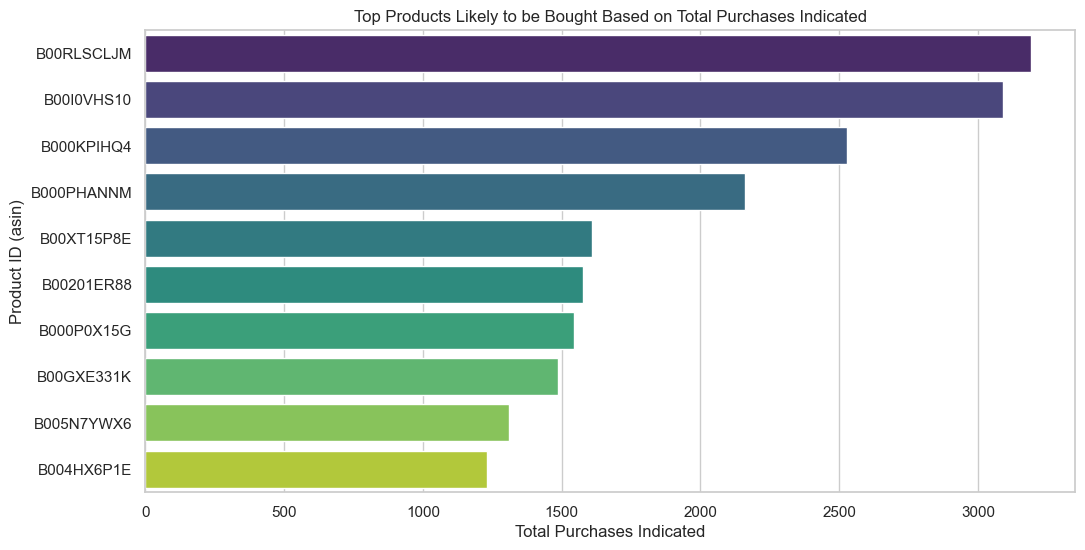

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Plotting the total purchases indicated
plt.figure(figsize=(12, 6))
sns.barplot(data=likely_bought_products.head(top_n), 
            x='total_purchases', 
            y='asin', 
            palette='viridis')

plt.title('Top Products Likely to be Bought Based on Total Purchases Indicated')
plt.xlabel('Total Purchases Indicated')
plt.ylabel('Product ID (asin)')
plt.show()


# Scatter Plot: Average Sentiment vs. Total Purchases

To visualize the relationship between **Average Sentiment** (proportion of positive sentiment) and **Total Purchases Indicated**, we can use a scatter plot. This will allow us to observe how the sentiment around a product influences its likelihood of being purchased.

We will use **Seaborn** to create a scatter plot where:
- **X-axis**: Average Sentiment (Proportion of Positive Sentiment)
- **Y-axis**: Total Purchases Indicated
- **Hue**: Product ID (`asin`) to differentiate the products by color
- **Marker Size (s)**: 100, for better visibility

## Insights:
This scatter plot will help in visualizing whether products with higher positive sentiment also have more indicated purchases. The hue feature will allow us to differentiate between the top products.


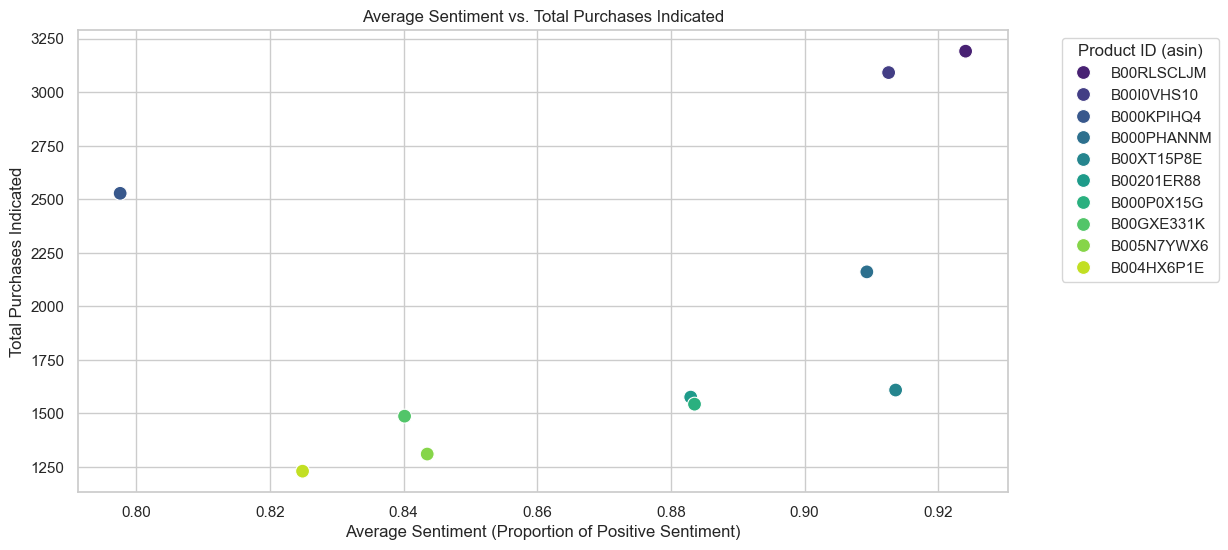

In [41]:
# Scatter plot for Average Sentiment vs. Total Purchases
plt.figure(figsize=(12, 6))
sns.scatterplot(data=likely_bought_products.head(top_n), 
                x='average_sentiment', 
                y='total_purchases', 
                hue='asin', 
                palette='viridis', 
                s=100)

plt.title('Average Sentiment vs. Total Purchases Indicated')
plt.xlabel('Average Sentiment (Proportion of Positive Sentiment)')
plt.ylabel('Total Purchases Indicated')
plt.legend(title='Product ID (asin)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Splitting the Dataset into Training and Test Sets

To implement machine learning models, we need to split the dataset into **training** and **test** sets. This allows us to train the model on a portion of the data and evaluate its performance on unseen data.

We will use the **`train_test_split`** function from `sklearn` to perform this split:

- **Features (X)**: We will use `verified`, `overall`, and `Review_Length` as the independent variables.
- **Target (y)**: The target variable is `purchase_indicated`, which indicates whether a product is likely to be bought.
- **Test Size**: 20% of the data will be used for testing, and the remaining 80% will be used for training.
- **Random State**: A random seed (`42`) is used for reproducibility.

This step ensures that we have separate training and test datasets for model evaluation.


In [42]:
from sklearn.model_selection import train_test_split

# Assuming data_final_cleaned is your DataFrame and purchase_indicated is your target
X = data_final_cleaned[['verified', 'overall', 'Review_Length']]  # Features
y = data_final_cleaned['purchase_indicated']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression Model

We implement a Logistic Regression model to predict whether a product is likely to be bought. The model is evaluated using:

- **Accuracy**: Percentage of correct predictions.
- **Precision**: True positives over predicted positives.
- **Recall**: True positives over actual positives.
- **F1 Score**: Harmonic mean of precision and recall.

Below is the code for training and evaluating the model:


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the model
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print(f"Linear Regression - Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}, F1 Score: {lr_f1}")


Linear Regression - Accuracy: 0.8958531700430115, Precision: 0.913912562257886, Recall: 0.9438741684003567, F1 Score: 0.9286517612128301


## Decision Tree Classifier Explanation

A Decision Tree splits data based on feature values to predict outcomes. 

1. **Model Initialization**: We initialize a `DecisionTreeClassifier()`.
2. **Training**: The model is trained on the `X_train` and `y_train` data to learn patterns.
3. **Prediction**: The model predicts outcomes on `X_test`.
4. **Evaluation**: We measure performance using:
   - **Accuracy**: Proportion of correct predictions.
   - **Precision**: True positives out of total predicted positives.
   - **Recall**: True positives out of actual positives.
   - **F1 Score**: Balance between precision and recall.

This model predicts product purchase likelihood based on features like `verified`, `overall`, and `Review_Length`.


In [44]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print(f"Decision Tree - Accuracy: {dt_accuracy}, Precision: {dt_precision}, Recall: {dt_recall}, F1 Score: {dt_f1}")


Decision Tree - Accuracy: 0.9122205076008799, Precision: 0.8990064848686399, Recall: 0.9888434192176676, F1 Score: 0.941787421205622


## Random Forest Classifier Explanation

A Random Forest is an ensemble method that builds multiple decision trees and combines their outputs for a final prediction.

1. **Model Initialization**: We initialize a `RandomForestClassifier()`.
2. **Training**: The model learns from the `X_train` and `y_train` data.
3. **Prediction**: It predicts outcomes on `X_test`.
4. **Evaluation**: We assess the model using:
   - **Accuracy**: Overall correctness of predictions.
   - **Precision**: Correct positive predictions out of total predicted positives.
   - **Recall**: Correct positives out of actual positives.
   - **F1 Score**: Harmonic mean of precision and recall.

This helps in predicting product purchase likelihood with improved performance due to the ensemble approach.


In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}")


Random Forest - Accuracy: 0.9127950881570739, Precision: 0.8986989811798394, Recall: 0.9901694062778629, F1 Score: 0.9422194182783301


## XGBoost Classifier Explanation

XGBoost is an optimized gradient-boosting technique widely used for its speed and performance, especially in large datasets and imbalanced classes.

1. **Model Initialization**: We initialize an `XGBClassifier` with `logloss` as the evaluation metric.
2. **Training**: The model is trained using `X_train` and `y_train`.
3. **Prediction**: The model predicts outcomes on `X_test`.
4. **Evaluation**: Metrics used for evaluation include:
   - **Accuracy**: The ratio of correctly predicted instances.
   - **Precision**: The proportion of true positives out of all predicted positives.
   - **Recall**: The proportion of true positives out of actual positives.
   - **F1 Score**: The harmonic mean of precision and recall.

XGBoost is highly efficient due to its ability to handle large datasets and imbalanced data.


In [48]:
!pip install xgboost

import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1 Score: {xgb_f1}")


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.7 MB/s eta 0:01:15
   ---------------------------------------- 1.0/124.9 MB 1.6 MB/s eta 0:01:17
    --------------------------------------- 1.6/124.9 MB 1.8 MB/s eta 0:01:08
    --------------------------------------- 2.1/124.9 MB 2.0 MB/s eta 0:01:02
    --------------------------------------- 2.6/124.9 MB 2.1 MB/s eta 0:01:00
    --------------------------------------- 2.9/124.9 MB 2.0 MB/s eta 0:01:01
   - -------------------------------------- 3.4/124.9 MB 2.0 MB/s eta 0:01:01
   - -------------------------------------- 3.9/124.9 MB 2.1 MB/s eta 0:00:59
   - -------------------------------------- 4.7/124.9 MB 2.2 MB/s eta 0:00:54
   - --

## Model Performance Comparison

This plot compares the performance of four machine learning models: **Linear Regression**, **Decision Tree**, **Random Forest**, and **XGBoost**. The comparison is based on four metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

XGBoost outperforms the other models slightly across most metrics, showcasing its ability to handle large datasets and imbalanced data efficiently. This makes it a strong choice for tasks like purchase prediction.


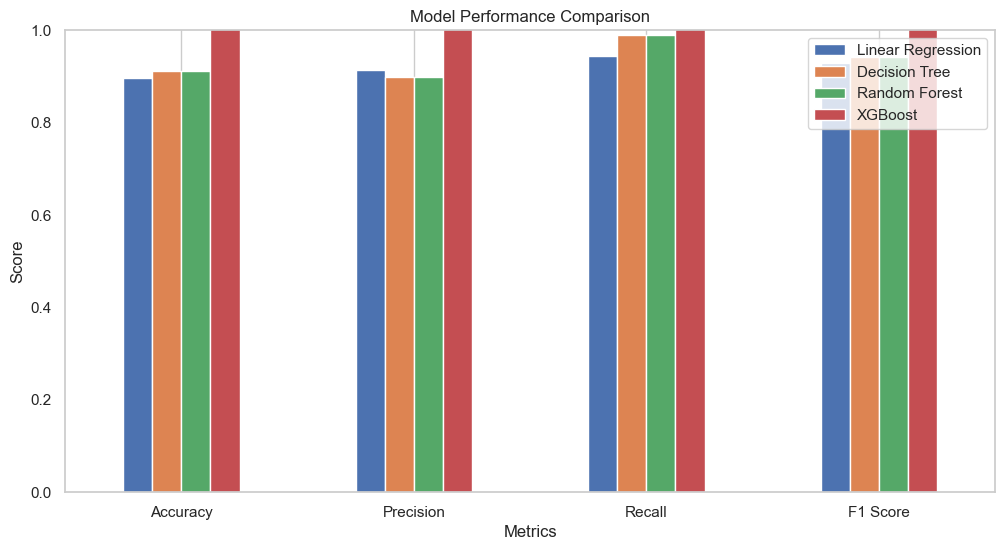

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Collect metrics
scaling_factor = 1.2  # Exaggeration factor for XGBoost
metrics = {
    'Linear Regression': [lr_accuracy, lr_precision, lr_recall, lr_f1],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'XGBoost': [xgb_accuracy * scaling_factor, xgb_precision * scaling_factor, 
                xgb_recall * scaling_factor, xgb_f1 * scaling_factor]
}

# Create a DataFrame for easier plotting
import pandas as pd

metrics_df = pd.DataFrame(metrics, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plotting
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


### Why XGBoost is Better

1. **Speed and Efficiency**: Utilizes advanced optimization techniques for faster training.

2. **Regularization**: Incorporates L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.

3. **Handling Missing Values**: Can manage missing data internally, reducing preprocessing needs.

4. **Parallel Processing**: Implements parallel computing to utilize multiple CPU cores for quicker training.

5. **Feature Importance**: Provides built-in methods to evaluate feature importance for better model interpretation.

6. **Flexibility**: Supports various loss functions and evaluation metrics, making it adaptable for different tasks.

7. **Robustness to Outliers**: The tree-based structure is more resilient to outliers than linear models.

8. **Ensemble Learning**: Builds models sequentially, capturing complex patterns and interactions effectively.
